In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
import os
import pwd
import figformat
fig_width,fig_height,params=figformat.figure_format(fig_width=3.4,fig_height=3.4)
mpl.rcParams.update(params)
#mpl.rcParams.keys()
#help(figformat)
def get_username():
    return pwd.getpwuid(os.getuid())[0]
user = get_username()

run_dir  = pathlib.Path(rf"/Users/{user}/GitHub/LEC/examples/") #path to TABLES

print(f"run_dir: {run_dir}")

run_dir: /Users/StevE/GitHub/LEC/examples


### The function $q(\chi_e)$ for $\chi_e\ll 1$
\begin{equation}
    q(\chi_e\ll 1)\approx 1-\frac{55}{16}\sqrt{3}\chi + 48\chi^2 \nonumber
\end{equation}

In [2]:
def func(x):
    f=1-(55/16)*np.sqrt(3)*x + 48*x**2
    return f
x=np.arange(0.001,10,0.001)

### The function $q(\chi_e)$ for $\chi_e\gg 1$
\begin{equation}
    q(\chi_e\gg 1)\approx\frac{48}{243}\Gamma(\frac{2}{3})\chi^{-4/3} 
    \left[ 1 -\frac{81}{16\Gamma(2/3)}(3\chi)^{-2/3} \right] \nonumber
\end{equation}

In [3]:
def func2(y):
    f2=(48/243)*1.354*2.08*y**(-4/3)*(1-(81/16)*0.73855*(3*y)**(-2/3))
    return f2
y=np.arange(0.1,100,0.001)

### Extract $\chi_e$, $P_\mathrm{Q}$, $P_\mathrm{C}$, and $q(\chi_e)$

In [4]:
Xi,Prad,Pc,g = np.loadtxt('P_rad.dat',unpack=True,usecols=[0,1,2,3],dtype=np.float)

<IPython.core.display.Javascript object>


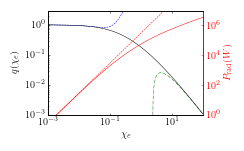

In [8]:
fig, ax = plt.subplots()
ax.plot(x,func(x), "b", ls='--')
ax.plot(y,func2(y),"g", ls='-.')

ax.plot(Xi, g, color='black')
ax.set_xlim(0.001,100)
ax.set_ylim(0.001,3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("$\chi_e$")
ax.set_ylabel("$q(\chi_e)$")
ax.minorticks_on()

ax2 = ax.twinx()
ax2.plot(Xi,Prad,'-y',color='red',label='$P_Q$')
ax2.plot(Xi,Pc,'--',color='red',label='$P_Q$')
ax2.set_ylim(1,1e7)
ax2.set_yscale('log')
ax2.set_ylabel("$P_\mathrm{rad} (W)$",color='red')
ax2.minorticks_on()
ax2.tick_params(axis='y',labelcolor='red')
ax2.tick_params(which='major',color='red')
ax2.tick_params(which='minor',color='red')
ax2.spines['right'].set_color('red')

eq1 = r"\begin{eqnarray*}" + \
      r"g(\chi_e\ll 1)&\approx&1-\frac{55}{16}\sqrt{3}\chi \\&+& 48\chi^2" + \
      r"\end{eqnarray*}"
#ax.text(0.35, 0.4, eq1, {'color': 'b', 'fontsize': 15}, va="top", ha="right")
eq2 = r"\begin{eqnarray*}" + \
      r"&&g(\chi_e\gg 1)\approx\frac{48}{243}\Gamma(\frac{2}{3})\chi^{-4/3} \\" + \
      r"&& \times \{ 1 -\frac{81}{16\Gamma(2/3)}(3\chi)^{-2/3} \}" + \
      r"\end{eqnarray*}"
#ax.text(1, 0.01, eq2, {'color': 'g', 'fontsize': 15}, va="top", ha="right")
fig = plt.gcf()
fig.set_size_inches(fig_width, fig_width/1.618)
fig.tight_layout()
plt.show()

In [9]:
fig.savefig(rf"/Users/StevE/GitHub/LEC/docs/source/figures/qchi.png",format='png',dpi=600,transparent=True, bbox_inches='tight')